In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_auc_score,roc_curve,auc,f1_score
from sklearn import metrics

In [3]:
merged_df = pd.DataFrame()
merged_df = pd.read_csv('Paper33SupData/merged/Merged2WeekSet1')
print(merged_df)

     id     SpeedMean  SpeedVariance  TotalDistance  LocationVariance  \
0   u00  4.021665e-05   7.351331e-07      12.335223         -5.921599   
1   u01  3.726261e-07   1.783295e-12       0.447206        -12.336886   
2   u02  1.459056e-06   1.781221e-10       3.000935         -5.240235   
3   u05  9.244979e-07   4.140170e-11       3.480151         -3.008159   
4   u08  4.915202e-07   1.447804e-12       2.303354         -5.793552   
..  ...           ...            ...            ...               ...   
91  u53  2.063835e-06   7.157614e-10       0.173169         -9.972007   
92  u56  2.194304e-07   2.966967e-12       2.235931         -2.101127   
93  u57  8.741317e-06   2.199000e-09      14.452125          3.625106   
94  u58  1.742192e-06   8.071546e-11       0.572358         -8.079940   
95  u59  1.242560e-05   8.971419e-09       0.764000         -9.357054   

    CircadianMovement  NumberofClusters   Entropy  NormalizedEntropy  \
0            6.428740                 3  0.812399  

In [4]:
merged_df = merged_df.drop(columns=['id'])

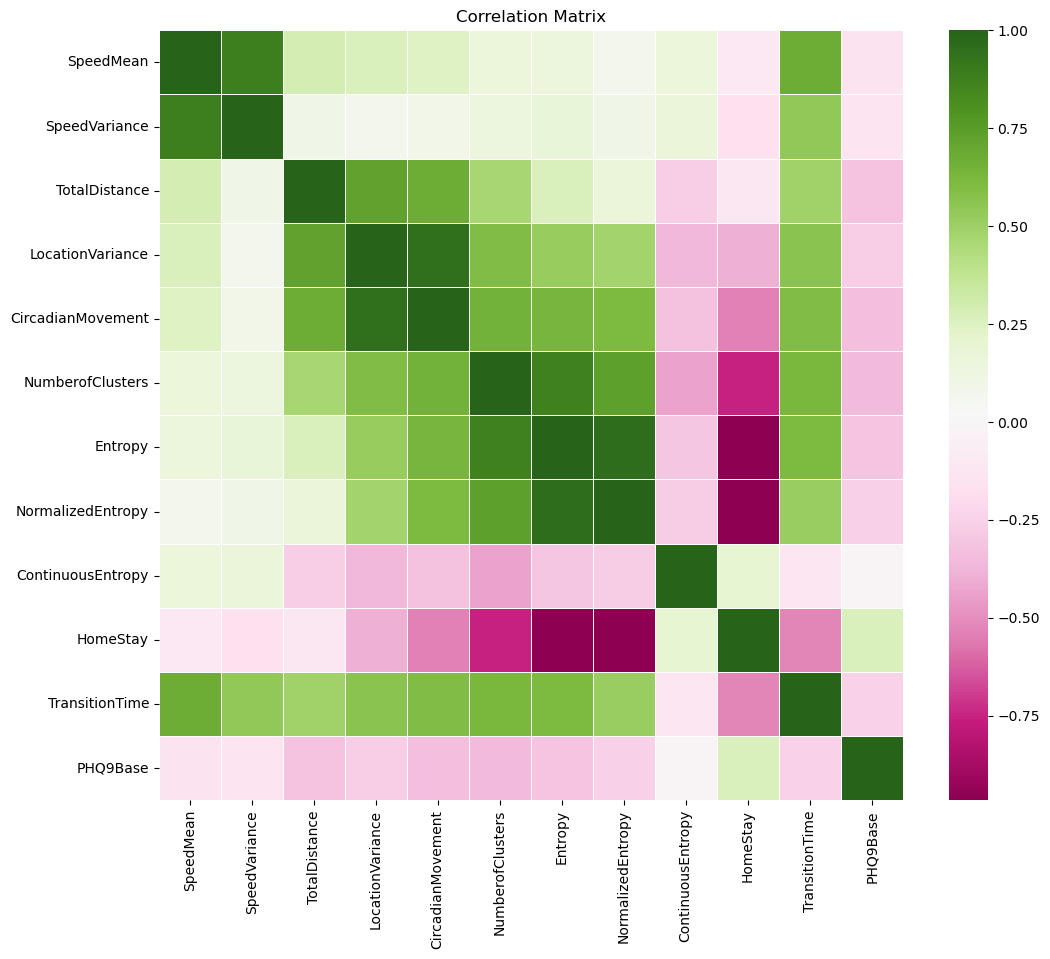

In [5]:
correlation_matrix = merged_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='PiYG', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')

plt.show()

# Machine Learning Models:
These are all basic models - no fine tuning or model specific data pre-processing


In [76]:
#creates classes for classification
#creates 3 classes
dataClassificationThree = merged_df.copy()
columns = ['PHQ9Base']
# columns = ['PHQ9']

for column in columns:
    dataClassificationThree.loc[((dataClassificationThree[column] > 0)& (dataClassificationThree[column]<=5)), column] = 0
    dataClassificationThree.loc[((dataClassificationThree[column] > 5)& (dataClassificationThree[column]<=10)), column] = 1
    dataClassificationThree.loc[((dataClassificationThree[column] > 10)), column] = 2

print(dataClassificationThree)


       SpeedMean  SpeedVariance  TotalDistance  LocationVariance  \
0   4.021665e-05   7.351331e-07      12.335223         -5.921599   
1   3.726261e-07   1.783295e-12       0.447206        -12.336886   
2   1.459056e-06   1.781221e-10       3.000935         -5.240235   
3   9.244979e-07   4.140170e-11       3.480151         -3.008159   
4   4.915202e-07   1.447804e-12       2.303354         -5.793552   
5   8.196724e-07   1.725046e-11       4.721349         -3.657249   
6   5.473887e-07   7.567248e-12       0.447416        -12.345396   
7   8.992635e-06   1.629466e-09      28.432431          1.384059   
8   9.027260e-07   3.891506e-11       1.493131         -7.123582   
9   7.798984e-07   4.053273e-11       0.523751        -12.817784   
10  4.946600e-07   7.688164e-12       0.748345        -10.235398   
11  5.614021e-07   2.161137e-11       0.316402        -12.520971   
12  3.215280e-07   9.839338e-13       0.343521        -12.771321   
13  8.036426e-07   5.711299e-11       2.561057  

In [6]:
#creates classes for classification
#creates 2 classes
dataClassification = merged_df.copy()
columns = ['PHQ9Base']
# columns = ['PHQ9']

for column in columns:
    dataClassification.loc[((dataClassification[column] > 0)& (dataClassification[column]<=5)), column] = 0
    dataClassification.loc[((dataClassification[column] > 5)), column] = 1

print(dataClassification)

       SpeedMean  SpeedVariance  TotalDistance  LocationVariance  \
0   4.021665e-05   7.351331e-07      12.335223         -5.921599   
1   3.726261e-07   1.783295e-12       0.447206        -12.336886   
2   1.459056e-06   1.781221e-10       3.000935         -5.240235   
3   9.244979e-07   4.140170e-11       3.480151         -3.008159   
4   4.915202e-07   1.447804e-12       2.303354         -5.793552   
..           ...            ...            ...               ...   
91  2.063835e-06   7.157614e-10       0.173169         -9.972007   
92  2.194304e-07   2.966967e-12       2.235931         -2.101127   
93  8.741317e-06   2.199000e-09      14.452125          3.625106   
94  1.742192e-06   8.071546e-11       0.572358         -8.079940   
95  1.242560e-05   8.971419e-09       0.764000         -9.357054   

    CircadianMovement  NumberofClusters   Entropy  NormalizedEntropy  \
0            6.428740                 3  0.812399           0.739477   
1           -0.303252                 1

In [7]:
# print(dataClassification['PHQ9'].unique())
print(dataClassification['PHQ9Base'].unique())

[0 1]


In [25]:
X = dataClassification.drop(['PHQ9Base'], axis=1)
# X = dataClassification.drop(['PHQ9'], axis=1)
# y_PHQ9 = dataClassification['PHQ9']
y_PHQ9Base = dataClassification['PHQ9Base']


In [9]:
# Create the confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    ''' Plot the confusion matrix for the target labels and predictions '''
    cm = confusion_matrix(y_test, y_pred)

  
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),
                  range(cm.shape[1]))

    
    sns.set(font_scale=1.4) 
    sns.heatmap(df_cm, annot=True,fmt='.0f',cmap="YlGnBu",annot_kws={"size": 10}) 
    plt.show()

In [10]:
# ROC Curve
def plot_roc_curve(y_test, y_pred):
    ''' Plot the ROC curve for the target labels and predictions'''
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc= auc(fpr,tpr)
    plt.figure(figsize=(12, 12))
    ax = plt.subplot(121)
    ax.set_aspect(1)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [11]:
#Function to train and evaluate:
def TrainandEval(model, features, target, name):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    print("Train score:", model.score(X_train, y_train))
    print("Validation score:", model.score(X_test, y_test))

    y_pred = model.predict(X_test)
    #print the classification report to highlight the accuracy with f1-score, precision and recall
    print(metrics.classification_report(y_test, y_pred))
    print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    plot_roc_curve(y_test, y_pred)


In [12]:
#declare all model vars:
LR = LogisticRegression()
SVM = SVC()
RF = RandomForestClassifier() 
XGB = XGBClassifier()


## Logistic Regression 

Train score: 0.75
Validation score: 0.7
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.50      0.67      0.57         6

    accuracy                           0.70        20
   macro avg       0.67      0.69      0.67        20
weighted avg       0.73      0.70      0.71        20

Number of mislabeled points out of a total 20 points : 6
Accuracy: 0.7


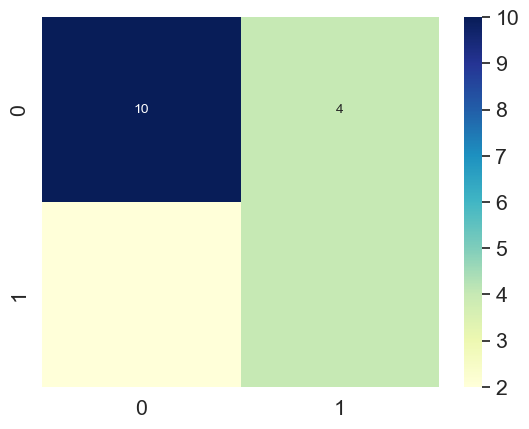

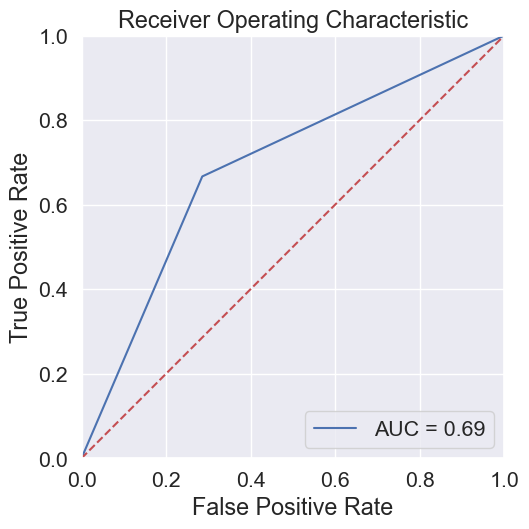

In [13]:
TrainandEval(LR, X, y_PHQ9Base, 'log Reg')

## Support Vector Machine (SVM)

Train score: 0.6842105263157895
Validation score: 0.7
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       0.00      0.00      0.00         6

    accuracy                           0.70        20
   macro avg       0.35      0.50      0.41        20
weighted avg       0.49      0.70      0.58        20

Number of mislabeled points out of a total 20 points : 6
Accuracy: 0.7


/opt/homebrew/anaconda3/envs/Diss/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/Diss/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/Diss/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

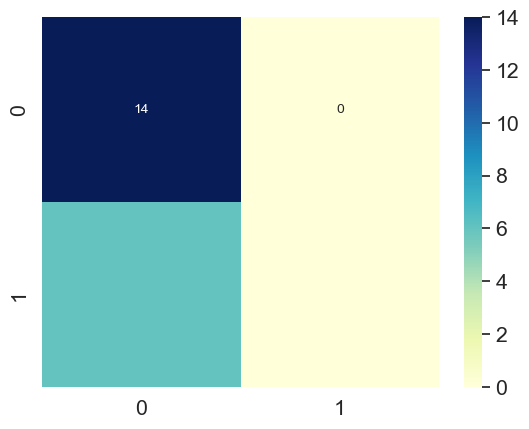

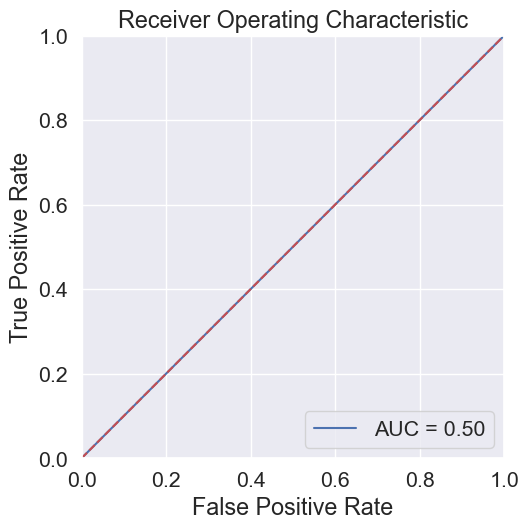

In [14]:
TrainandEval(SVM, X, y_PHQ9Base, 'log Reg')

## Random Forest 

Train score: 1.0
Validation score: 0.6
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.38      0.50      0.43         6

    accuracy                           0.60        20
   macro avg       0.56      0.57      0.56        20
weighted avg       0.64      0.60      0.61        20

Number of mislabeled points out of a total 20 points : 8
Accuracy: 0.6


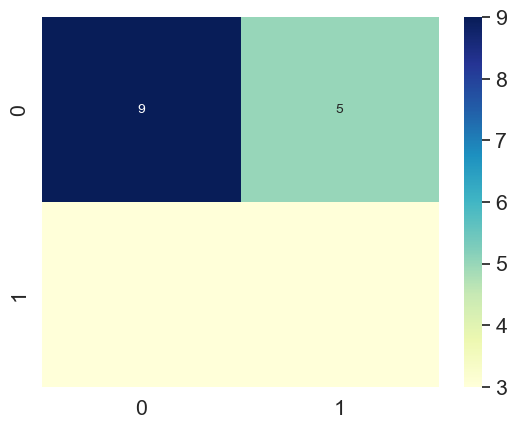

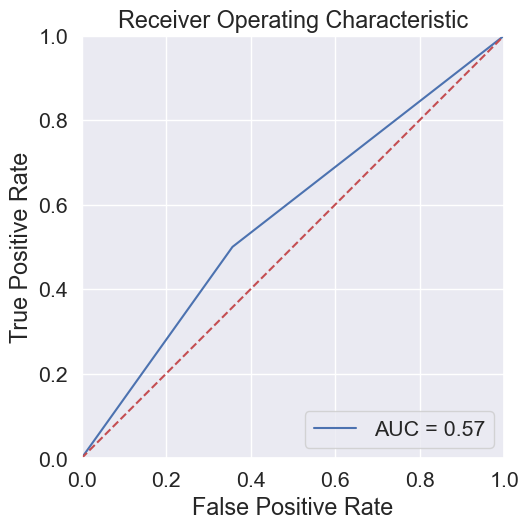

In [15]:
TrainandEval(RF, X, y_PHQ9Base, 'log Reg')

## XGBoost

Train score: 1.0
Validation score: 0.6
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.40      0.67      0.50         6

    accuracy                           0.60        20
   macro avg       0.60      0.62      0.58        20
weighted avg       0.68      0.60      0.62        20

Number of mislabeled points out of a total 20 points : 8
Accuracy: 0.6


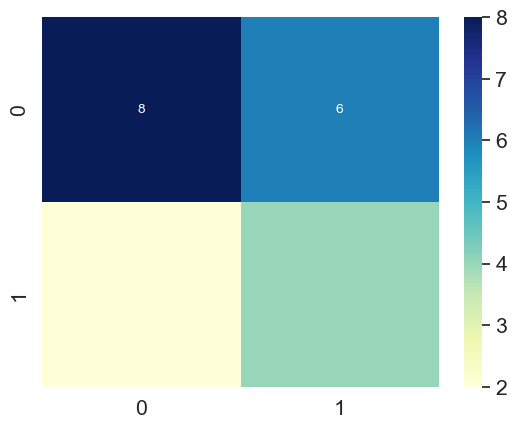

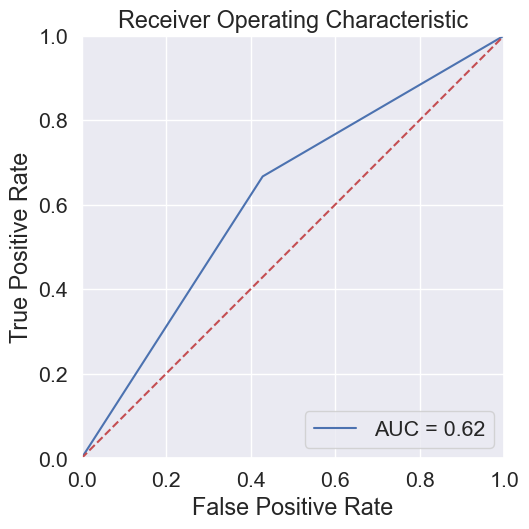

In [16]:
TrainandEval(XGB, X, y_PHQ9Base, 'log Reg')

# Improved ML Models

In [17]:
# Initialize the StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

## SVM

Train score: 0.6842105263157895
Validation score: 0.7
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       0.00      0.00      0.00         6

    accuracy                           0.70        20
   macro avg       0.35      0.50      0.41        20
weighted avg       0.49      0.70      0.58        20

Number of mislabeled points out of a total 20 points : 6
Accuracy: 0.7


/opt/homebrew/anaconda3/envs/Diss/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/Diss/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/Diss/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

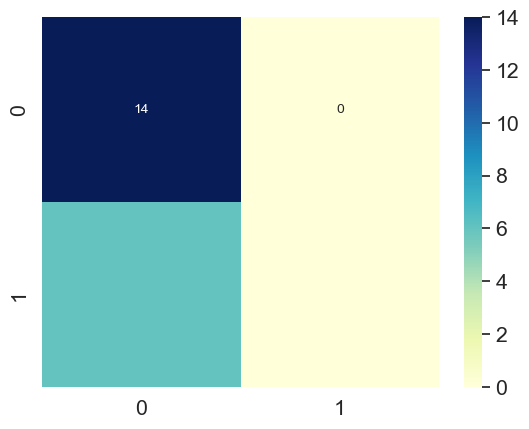

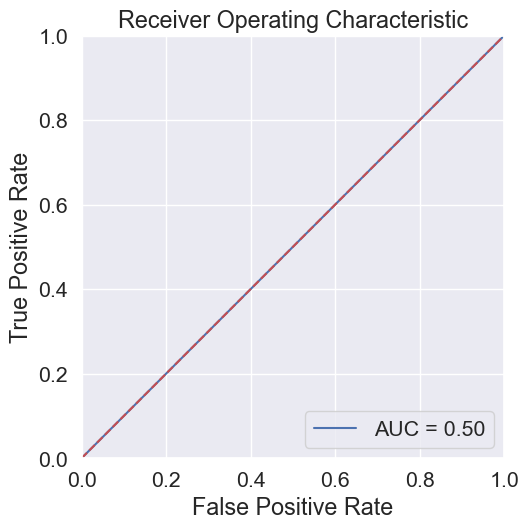

In [18]:
TrainandEval(SVM, X_scaled, y_PHQ9Base, 'log Reg')

## LR

Train score: 0.7105263157894737
Validation score: 0.55
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        14
           1       0.20      0.17      0.18         6

    accuracy                           0.55        20
   macro avg       0.43      0.44      0.44        20
weighted avg       0.53      0.55      0.54        20

Number of mislabeled points out of a total 20 points : 9
Accuracy: 0.55


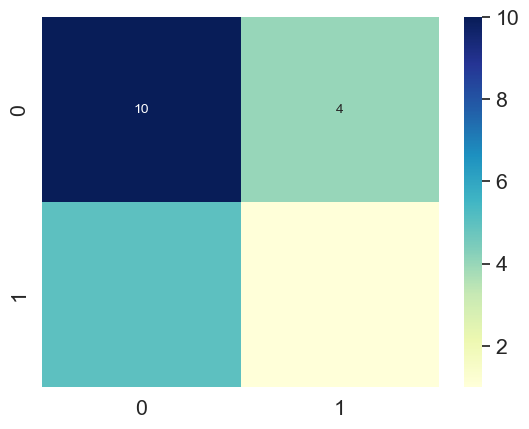

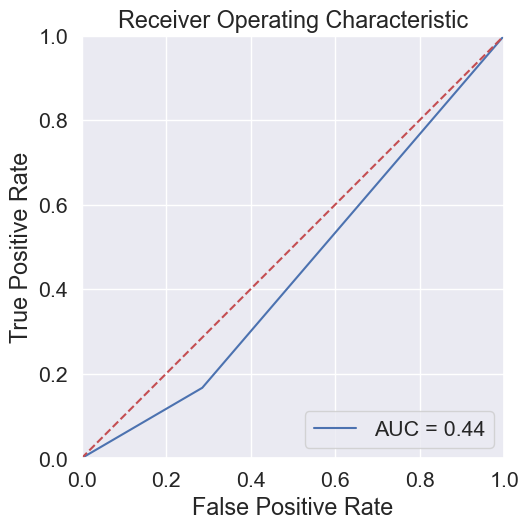

In [19]:
TrainandEval(LR, X_scaled, y_PHQ9Base, 'log Reg')

## Remove 1 Feature

NORMAL
Train score: 0.75
Validation score: 0.7
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.50      0.67      0.57         6

    accuracy                           0.70        20
   macro avg       0.67      0.69      0.67        20
weighted avg       0.73      0.70      0.71        20

Number of mislabeled points out of a total 20 points : 6
Accuracy: 0.7


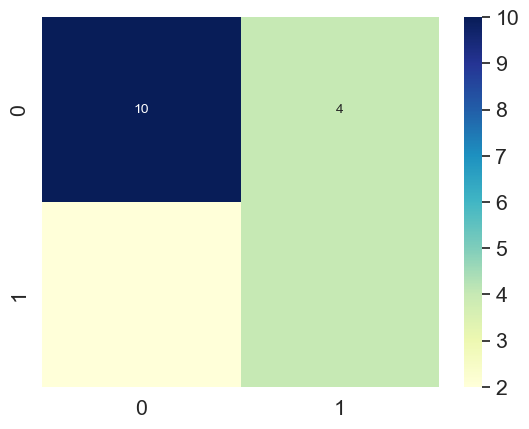

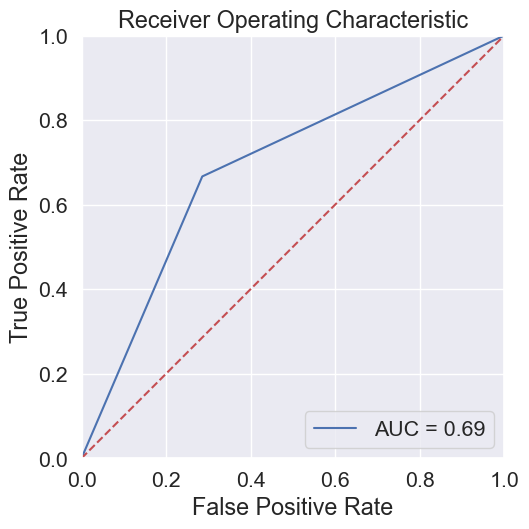

Train score: 0.6842105263157895
Validation score: 0.7
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       0.00      0.00      0.00         6

    accuracy                           0.70        20
   macro avg       0.35      0.50      0.41        20
weighted avg       0.49      0.70      0.58        20

Number of mislabeled points out of a total 20 points : 6
Accuracy: 0.7


/opt/homebrew/anaconda3/envs/Diss/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/Diss/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/Diss/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

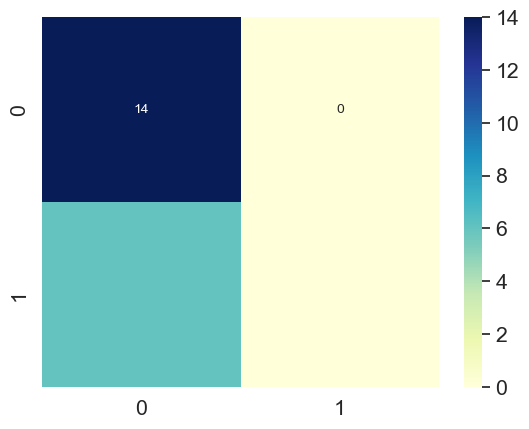

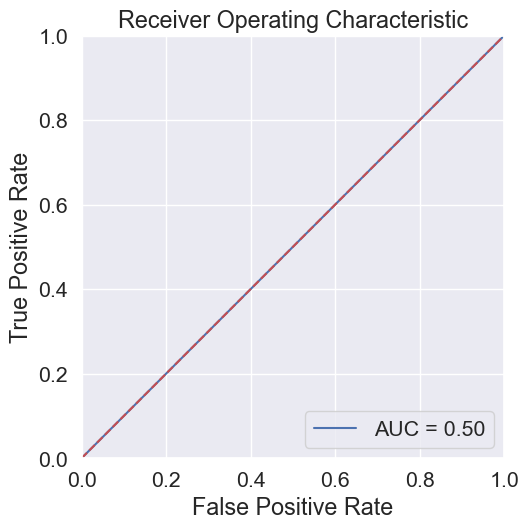

Train score: 1.0
Validation score: 0.7
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.50      0.50      0.50         6

    accuracy                           0.70        20
   macro avg       0.64      0.64      0.64        20
weighted avg       0.70      0.70      0.70        20

Number of mislabeled points out of a total 20 points : 6
Accuracy: 0.7


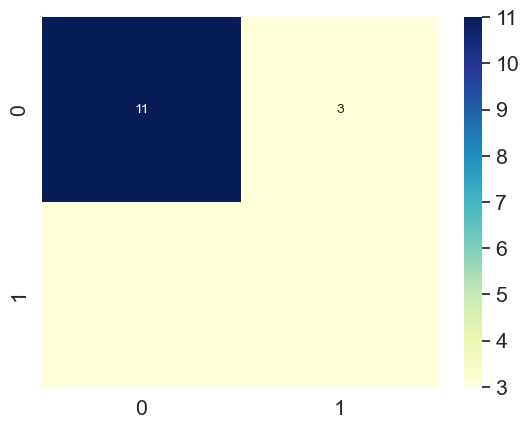

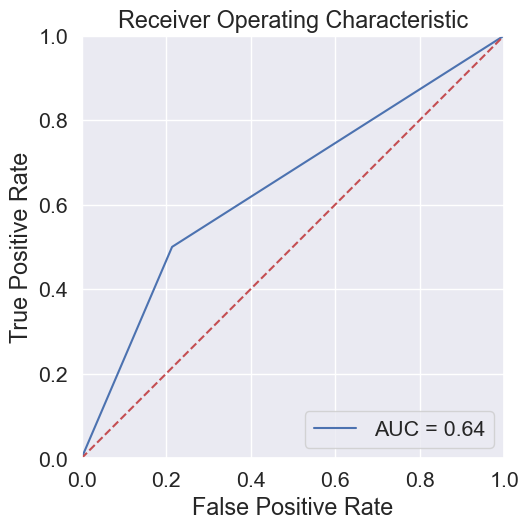

Train score: 1.0
Validation score: 0.6
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.40      0.67      0.50         6

    accuracy                           0.60        20
   macro avg       0.60      0.62      0.58        20
weighted avg       0.68      0.60      0.62        20

Number of mislabeled points out of a total 20 points : 8
Accuracy: 0.6


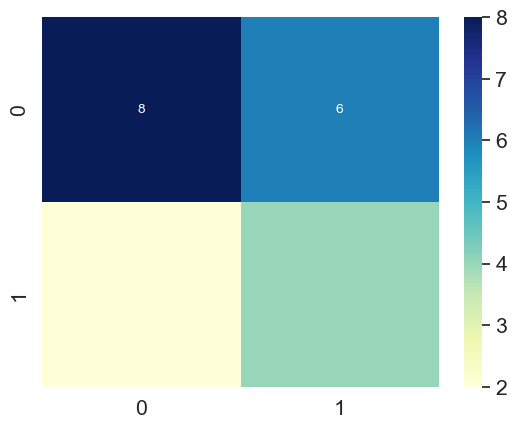

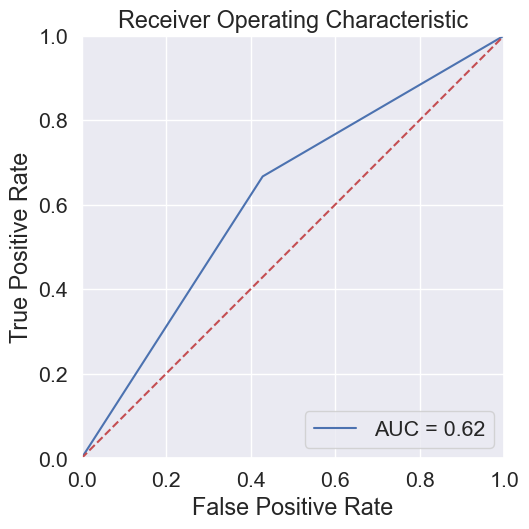

In [22]:
print('NORMAL')
TrainandEval(LR, X, y_PHQ9Base, 'log Reg')
TrainandEval(SVM, X, y_PHQ9Base, 'log Reg')
TrainandEval(RF, X, y_PHQ9Base, 'log Reg')
TrainandEval(XGB, X, y_PHQ9Base, 'log Reg')

In [20]:
print(X.keys())

Index(['SpeedMean', 'SpeedVariance', 'TotalDistance', 'LocationVariance',
       'CircadianMovement', 'NumberofClusters', 'Entropy', 'NormalizedEntropy',
       'ContinuousEntropy', 'HomeStay', 'TransitionTime'],
      dtype='object')


In [26]:
XDropped = X.drop(['HomeStay'], axis=1)

No HomeStay
Train score: 0.75
Validation score: 0.7
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.50      0.67      0.57         6

    accuracy                           0.70        20
   macro avg       0.67      0.69      0.67        20
weighted avg       0.73      0.70      0.71        20

Number of mislabeled points out of a total 20 points : 6
Accuracy: 0.7


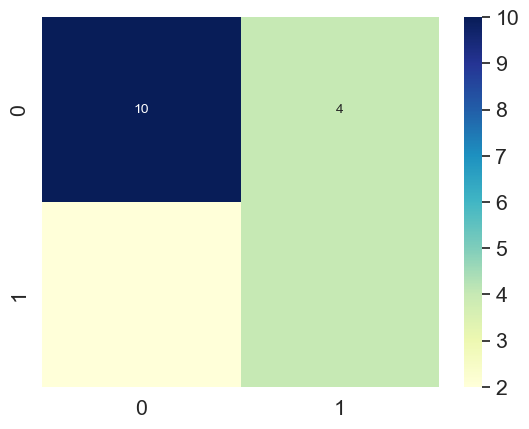

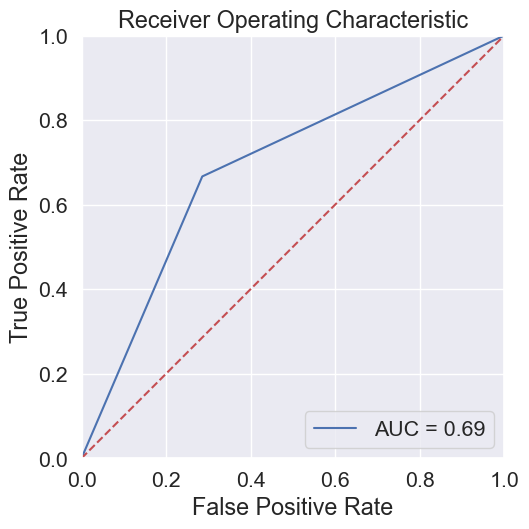

Train score: 0.6842105263157895
Validation score: 0.7
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       0.00      0.00      0.00         6

    accuracy                           0.70        20
   macro avg       0.35      0.50      0.41        20
weighted avg       0.49      0.70      0.58        20

Number of mislabeled points out of a total 20 points : 6
Accuracy: 0.7


/opt/homebrew/anaconda3/envs/Diss/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/Diss/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/Diss/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

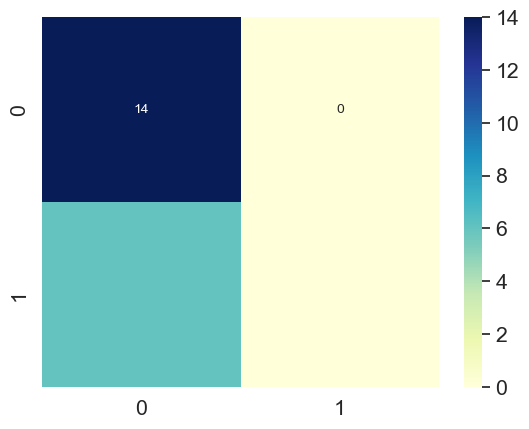

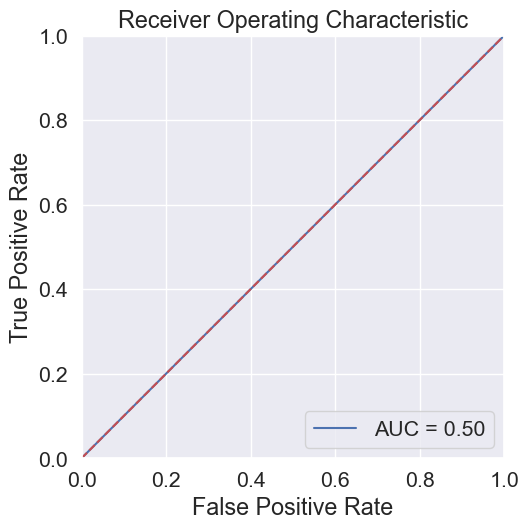

Train score: 1.0
Validation score: 0.7
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.50      0.50      0.50         6

    accuracy                           0.70        20
   macro avg       0.64      0.64      0.64        20
weighted avg       0.70      0.70      0.70        20

Number of mislabeled points out of a total 20 points : 6
Accuracy: 0.7


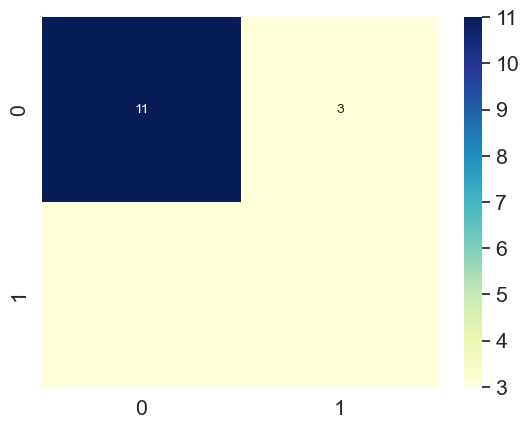

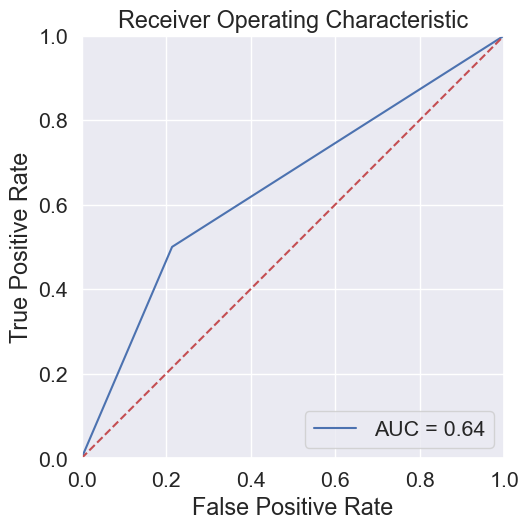

Train score: 1.0
Validation score: 0.6
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.40      0.67      0.50         6

    accuracy                           0.60        20
   macro avg       0.60      0.62      0.58        20
weighted avg       0.68      0.60      0.62        20

Number of mislabeled points out of a total 20 points : 8
Accuracy: 0.6


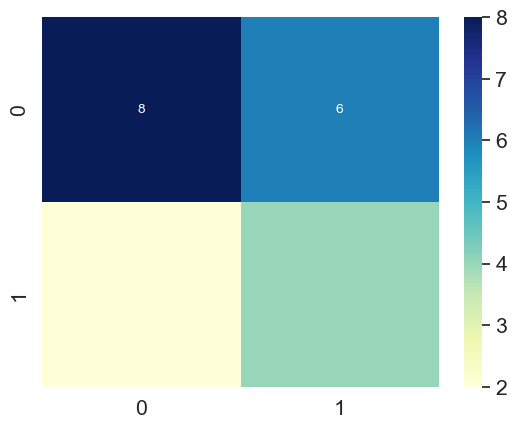

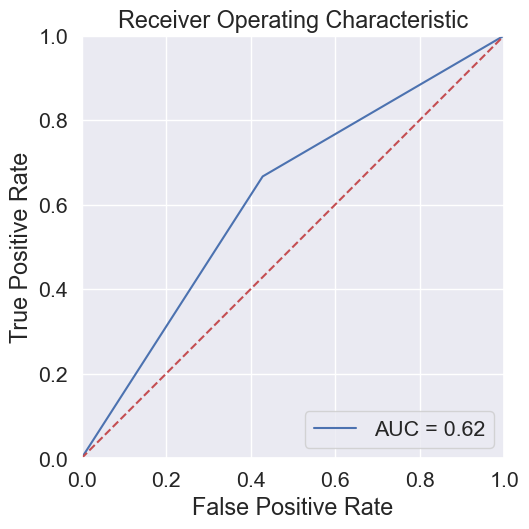

In [27]:
print('No HomeStay')
TrainandEval(LR, XDropped, y_PHQ9Base, 'log Reg')
TrainandEval(SVM, XDropped, y_PHQ9Base, 'log Reg')
TrainandEval(RF, XDropped, y_PHQ9Base, 'log Reg')
TrainandEval(XGB, XDropped, y_PHQ9Base, 'log Reg')

## Use just 1 feature

In [29]:
print(X.keys())
XDropped = X.drop(['Entropy'], axis=1)

Index(['SpeedMean', 'SpeedVariance', 'TotalDistance', 'LocationVariance',
       'CircadianMovement', 'NumberofClusters', 'Entropy', 'NormalizedEntropy',
       'ContinuousEntropy', 'HomeStay', 'TransitionTime'],
      dtype='object')


No Entropy
Train score: 0.75
Validation score: 0.7
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.50      0.67      0.57         6

    accuracy                           0.70        20
   macro avg       0.67      0.69      0.67        20
weighted avg       0.73      0.70      0.71        20

Number of mislabeled points out of a total 20 points : 6
Accuracy: 0.7


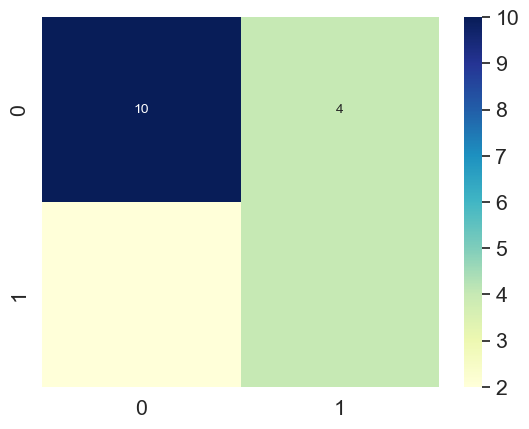

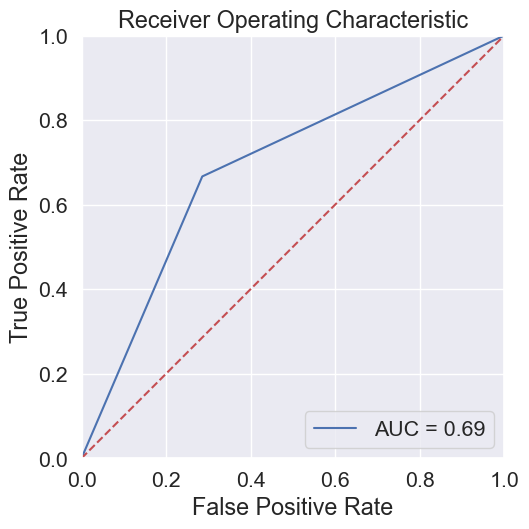

Train score: 0.6842105263157895
Validation score: 0.7
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       0.00      0.00      0.00         6

    accuracy                           0.70        20
   macro avg       0.35      0.50      0.41        20
weighted avg       0.49      0.70      0.58        20

Number of mislabeled points out of a total 20 points : 6
Accuracy: 0.7


/opt/homebrew/anaconda3/envs/Diss/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/Diss/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/Diss/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

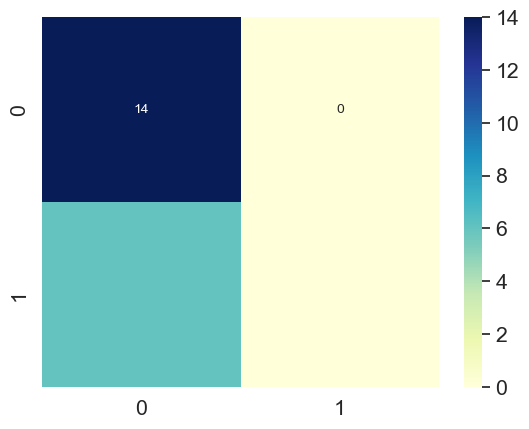

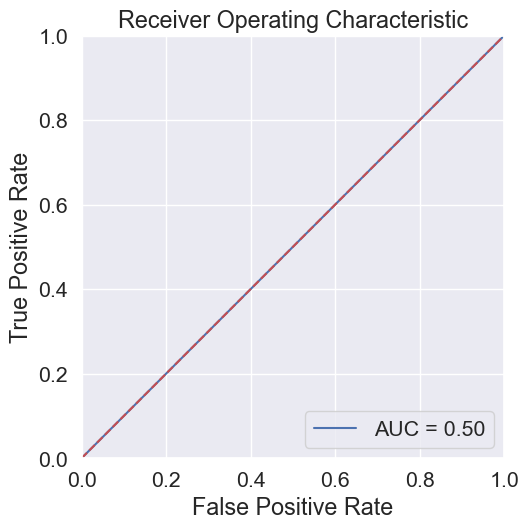

Train score: 1.0
Validation score: 0.6
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        14
           1       0.33      0.33      0.33         6

    accuracy                           0.60        20
   macro avg       0.52      0.52      0.52        20
weighted avg       0.60      0.60      0.60        20

Number of mislabeled points out of a total 20 points : 8
Accuracy: 0.6


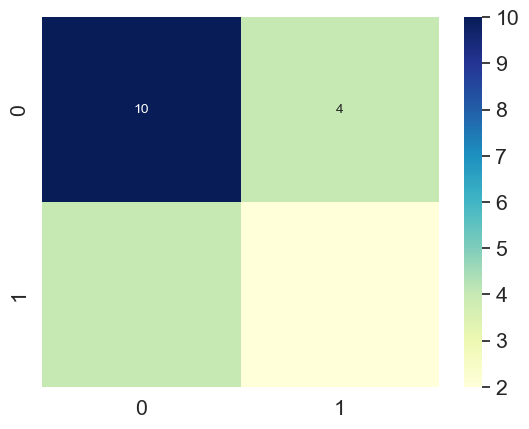

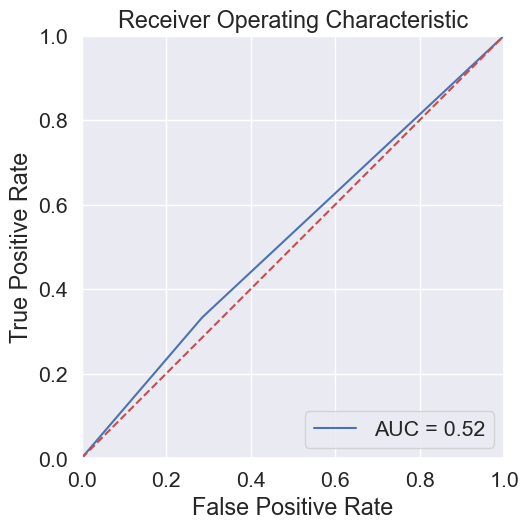

Train score: 1.0
Validation score: 0.6
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.38      0.50      0.43         6

    accuracy                           0.60        20
   macro avg       0.56      0.57      0.56        20
weighted avg       0.64      0.60      0.61        20

Number of mislabeled points out of a total 20 points : 8
Accuracy: 0.6


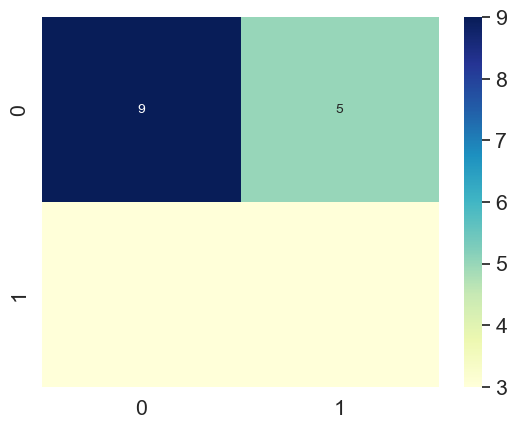

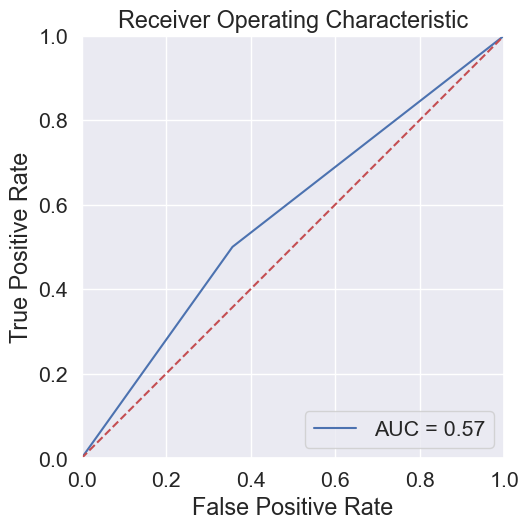

In [30]:
print('No Entropy')
TrainandEval(LR, XDropped, y_PHQ9Base, 'log Reg')
TrainandEval(SVM, XDropped, y_PHQ9Base, 'log Reg')
TrainandEval(RF, XDropped, y_PHQ9Base, 'log Reg')
TrainandEval(XGB, XDropped, y_PHQ9Base, 'log Reg')